# ATDA 5340 - Final - Part 3 - Data preprocessing - Denis Shilkin

https://catalog.data.gov/dataset/aviation-data-and-documentation-from-the-ntsb-accident-database-system
<br>Public: This dataset is intended for public access and use. 
<br>License: No license information was provided. If this work was prepared by an officer or employee of the United States government as part of that person's official duties it is considered a U.S. Government Work. 

### 1. Import libraries

In [1]:
# import libraries 
import pandas as pd
import numpy as np

from pandas.plotting import scatter_matrix
from matplotlib import pyplot

# supress warnings
import warnings
warnings.filterwarnings("ignore")

print("Diagnostic: Libraries loaded, warnings set to \"Ignore\"")

Diagnostic: Libraries loaded, warnings set to "Ignore"


### 2. Load dataset and check its size

In [2]:
filename = "convertcsv.csv"

df = pd.read_csv(filename, index_col=False)

print(df.shape)

(84088, 31)


Dataset has 84088 records (rows).

### Top 5 rows

In [3]:
print(df.head(5))

         _EventId _InvestigationType _AccidentNumber  _EventDate  \
0  20191118X84400           Accident      GAA20CA081  11/17/2019   
1  20191116X25814           Accident      GAA20CA076  11/15/2019   
2  20191112X03916           Accident      GAA20CA067  11/12/2019   
3  20191112X40210           Accident      GAA20CA080  11/11/2019   
4  20191111X00550           Accident      GAA20CA070  11/11/2019   

            _Location       _Country  _Latitude  _Longitude _AirportCode  \
0  West Jefferson, OH  United States  39.935555  -83.236389         49OH   
1     San Antonio, TX  United States        NaN         NaN          SAT   
2  Pembroke Pines, FL  United States  26.001111  -80.240833          HWO   
3      Fitzgerald, GA  United States  31.683889  -83.270834          FZG   
4       Kalispell, MT  United States  41.240277 -120.526111         9CL3   

       _AirportName  ... _PurposeOfFlight _AirCarrier _TotalFatalInjuries  \
0               NaN  ...         Personal         NaN    

### Bottom 5 rows

In [4]:
print(df.tail(5))

             _EventId _InvestigationType _AccidentNumber  _EventDate  \
84083  20041105X01764           Accident      CHI79FA064  08/02/1979   
84084  20001218X45448           Accident      LAX96LA321  06/19/1977   
84085  20061025X01555           Accident      NYC07LA005  08/30/1974   
84086  20001218X45447           Accident      LAX94LA336  07/19/1962   
84087  20001218X45444           Accident      SEA87LA080  10/24/1948   

             _Location       _Country  _Latitude  _Longitude _AirportCode  \
84083       Canton, OH  United States        NaN         NaN          NaN   
84084       EUREKA, CA  United States        NaN         NaN          NaN   
84085    Saltville, VA  United States  36.922223  -81.878056          NaN   
84086   BRIDGEPORT, CA  United States        NaN         NaN          NaN   
84087  MOOSE CREEK, ID  United States        NaN         NaN          NaN   

      _AirportName  ... _PurposeOfFlight _AirCarrier _TotalFatalInjuries  \
84083          NaN  ...     

### 3. Data preprocess
<br> Check number of NaNs (Null, No Value, etc.)

In [5]:
# check number of NaNs
print(df.isnull().sum())

_EventId                     0
_InvestigationType           4
_AccidentNumber              0
_EventDate                   0
_Location                   76
_Country                   507
_Latitude                54039
_Longitude               54048
_AirportCode             36439
_AirportName             33735
_InjurySeverity              0
_AircraftDamage           2676
_AircraftCategory        56751
_RegistrationNumber       3778
_Make                       70
_Model                      99
_AmateurBuilt              592
_NumberOfEngines          4970
_EngineType               4280
_FARDescription          57056
_Schedule                72269
_PurposeOfFlight          4791
_AirCarrier              79927
_TotalFatalInjuries      27068
_TotalSeriousInjuries    29726
_TotalMinorInjuries      28523
_TotalUninjured          14507
_WeatherCondition         3060
_BroadPhaseOfFlight       6691
_ReportStatus                0
_PublicationDate         14236
dtype: int64


### Data fields description and analysis.
Field - Number of NaNs - Field description
<br>_EventId - 0 - Event identifier, each event should have an id. Field is not useful for further analisys as it is unique.
<br>_InvestigationType - 4 - Type of investigation (Accident, Incident). Some events have no type. NULL value could be replaced with Unknown.
<br>_AccidentNumber - 0 - Number (identification) of an event in some recording systems. Field is not useful for further analisys as it is unique.
<br>_EventDate - 0 - Date of an event. Cannot be NULL.
<br>_Location - 76 - Location of an event (city, state in case of the US or other identifiable location if outside of the US). Some locations are NULL. There are other variables for locations data.
<br>_Country - 507 - some locations do not have county filled. It could have NULL values when an event happened outside of any country (i.e. under an ocean or a sea)
<br>_Latitude - 54039
<br>_Longitude - 54048
<br> _Latitude and _Longitude are geographical coordinates of an event. It should not be empty, but there are other location variables that could subsitute them. If we really need them we need to work with other variables to get exact coordinates of an event
<br>_AirportCode - 36439 - each airport has a code (3 or 4 letters). An event could happen outside of airport, so it could have NULL values. This variable could be used to define geographic location of an event.
<br>_AirportName - 33735 - Each airport has a human readable name. In case an event of outside of any airport this field would have NULL value.
<br> I would ignore Location variables. An event could happen at any location. But for general statistics these values could be useful to find which locations have more incidents.
<br>_InjurySeverity - 0 - Each event has assigned severity. Cannot be NULL
<br>_AircraftDamage - 2676 - Describes damage to an aircraft. NULL value indicates no damage, NULL should be replaced with "NODAMAGE"
<br>_AircraftCategory - 56751 - Describes category of an aircraft like airplane, baloon, etc. NULL value indicates that category was not defined or not recorded. Missing value could be determined by _Make and _Model variables.
<br>_RegistrationNumber - 3778 - Categoriacal value (non-numeric). NULL value indicates that aircraft was not registered. For analysis I would remove this column. Replacing NULL with something like "NOT REGISTERED" would affect results of analysis: lot of events would be falsely attributed to it.
<br>_Make - 70 - Each aircraft should have a producer like Boeing, Airbus, Cessna, etc. But some are made by people and do not have registered Maker.
<br>_Model - 99 - Some aircrafts do not have models because they were built by private persons.
<br>_AmateurBuilt - 592 - indicates if aircraft is built by amateur builder. NULL value indicates that data was not recorded for this variable, NULL could be replaced with "NO"
<br>_NumberOfEngines - 4970 - Some aircrafts has no engines (like baloon or glider). But sometimes aircraft definetely have 1 or more engines but information was not collected.
<br>_EngineType - 4280 - Describes engine types. NULL indicates either there is no an engine, or data is missing.
<br>_FARDescription - 57056 - Describes if an aircraft performed a specific function (i.e. Armed Forces or General Aviation, etc.). NULL indicates no data is recoded, it should be changed to Unknown.
<br>_Schedule - 72269 - Indicates if a flight was scheduled (like AA20 from DFW to London Heathrow), unscheduled (i.e. for Armed Forces interception) or unknown. NULL values should be replaced with "NO"
<br>_PurposeOfFlight - 4791 - Describes the purpose of flight. NULL values should be replaced by "Unknown"
<br>_AirCarrier - 79927 - Names aircarrier. Most of events have no aircarrier, because event happened with personal aircrafts that do not perform regular passengers transfers. I would ignore this column.
<br>_TotalFatalInjuries - 27068 - Describes number of total fatal injuries. NULL values should be replaced with "0"
<br>_TotalSeriousInjuries - 29726 - Describes number of total serious injuries. NULL values should be replaced with "0"
<br>_TotalMinorInjuries - 28523 - Describes number of total minor injuries. NULL values should be replaced with "0"
<br>_TotalUninjured - 14507 - Describes number of total uninjured. NULL values show that there are no data. Normally it should show total people on board minus all injures combined. But there is no variable for total passengers, so we cannot calculate this value. I would ignore it.
<br>_WeatherCondition - 3060 - This variable describes weather conditions. NULL values indicate that there is no data on file, or weather had nothing to do with an event. 
<br>_BroadPhaseOfFlight - 6691 - Describes phase of flight when an event happened. NULL values should have "UNKNOWN"
<br>_ReportStatus - 0 - Describes status of a report. Cannot have NULL values.
<br>_PublicationDate - 14236 - Date of a report publication. NULL value shows that report is not published (could be "Secret" or not ready for publication)

In [22]:
df2 = df[["_InvestigationType", "_EventDate", "_InjurySeverity", "_AircraftDamage", "_Make", "_Model", "_AmateurBuilt",
          "_FARDescription", "_Schedule", "_PurposeOfFlight", "_TotalFatalInjuries", "_TotalSeriousInjuries", 
          "_TotalMinorInjuries", "_BroadPhaseOfFlight"]]
print("\nTop 10 rows")
print(df2.head(5))


Top 10 rows
  _InvestigationType  _EventDate _InjurySeverity _AircraftDamage  \
0           Accident  11/17/2019     Unavailable     Substantial   
1           Accident  11/15/2019     Unavailable     Substantial   
2           Accident  11/12/2019     Unavailable             NaN   
3           Accident  11/11/2019     Unavailable     Substantial   
4           Accident  11/11/2019       Non-Fatal     Substantial   

                       _Make _Model _AmateurBuilt            _FARDescription  \
0                    Stinson    SR9            No  Part 91: General Aviation   
1                     Cessna    525            No  Part 91: General Aviation   
2                     Cessna    172            No  Part 91: General Aviation   
3  SYMPHONY AIRCRAFT IND INC     SA            No  Part 91: General Aviation   
4                     Cessna    195            No  Part 91: General Aviation   

  _Schedule _PurposeOfFlight  _TotalFatalInjuries  _TotalSeriousInjuries  \
0       NaN         P

In [7]:
df2[['_TotalSeriousInjuries', '_TotalMinorInjuries', '_TotalFatalInjuries']]=df2[['_TotalSeriousInjuries', '_TotalMinorInjuries', '_TotalFatalInjuries']].replace(np.NaN,0)

In [8]:
df2[['_InvestigationType']]=df2[['_InvestigationType']].replace(np.NaN,"Unknown")

In [9]:
df2[['_AircraftDamage']]=df2[['_AircraftDamage']].replace(np.NaN,"No damage")

In [10]:
df2[['_Make']]=df2[['_Make']].replace(np.NaN,"No make")

In [11]:
df2[['_Model']]=df2[['_Model']].replace(np.NaN,"No model")

In [12]:
df2[['_AmateurBuilt']]=df2[['_AmateurBuilt']].replace(np.NaN,"No")

In [13]:
df2[['_FARDescription']]=df2[['_FARDescription']].replace(np.NaN,"No")

In [14]:
df2[['_Schedule']]=df2[['_Schedule']].replace(np.NaN,"NO")

In [15]:
df2[['_PurposeOfFlight']]=df2[['_PurposeOfFlight']].replace(np.NaN,"Unknown")

In [16]:
df2[['_BroadPhaseOfFlight']]=df2[['_BroadPhaseOfFlight']].replace(np.NaN,"UNKNOWN")

In [17]:
print(df2.isnull().sum())

_InvestigationType       0
_EventDate               0
_InjurySeverity          0
_AircraftDamage          0
_Make                    0
_Model                   0
_AmateurBuilt            0
_FARDescription          0
_Schedule                0
_PurposeOfFlight         0
_TotalFatalInjuries      0
_TotalSeriousInjuries    0
_TotalMinorInjuries      0
_BroadPhaseOfFlight      0
dtype: int64


After we extracted only required columns into another dataset, changed NaN to proper values, and verified that there are no NaNs, we need to check datatypes.

In [18]:
print(df2.dtypes)

_InvestigationType        object
_EventDate                object
_InjurySeverity           object
_AircraftDamage           object
_Make                     object
_Model                    object
_AmateurBuilt             object
_FARDescription           object
_Schedule                 object
_PurposeOfFlight          object
_TotalFatalInjuries      float64
_TotalSeriousInjuries    float64
_TotalMinorInjuries      float64
_BroadPhaseOfFlight       object
dtype: object


Now we could perform EDA on this dataset.

In [19]:
print(df2.describe())

       _TotalFatalInjuries  _TotalSeriousInjuries  _TotalMinorInjuries
count         84088.000000           84088.000000         84088.000000
mean              0.573673               0.214157             0.342427
std               5.196384               1.117272             2.266509
min               0.000000               0.000000             0.000000
25%               0.000000               0.000000             0.000000
50%               0.000000               0.000000             0.000000
75%               0.000000               0.000000             0.000000
max             349.000000             111.000000           380.000000


### Graphs

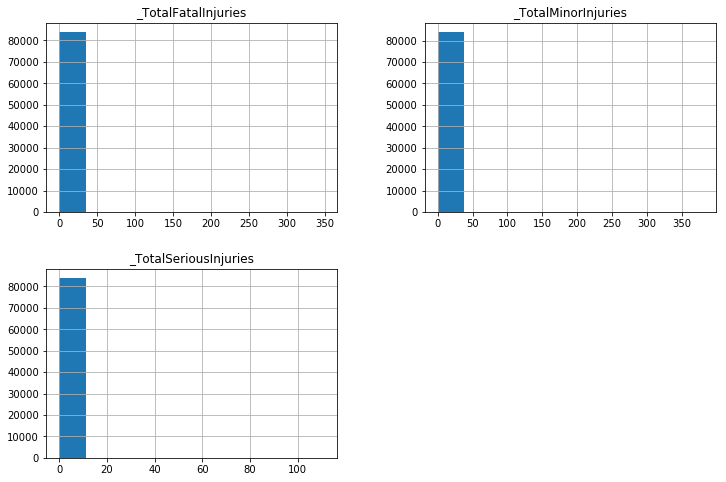

In [20]:
df2.hist(figsize=(12, 8))
pyplot.show()

No handles with labels found to put in legend.
No handles with labels found to put in legend.
No handles with labels found to put in legend.


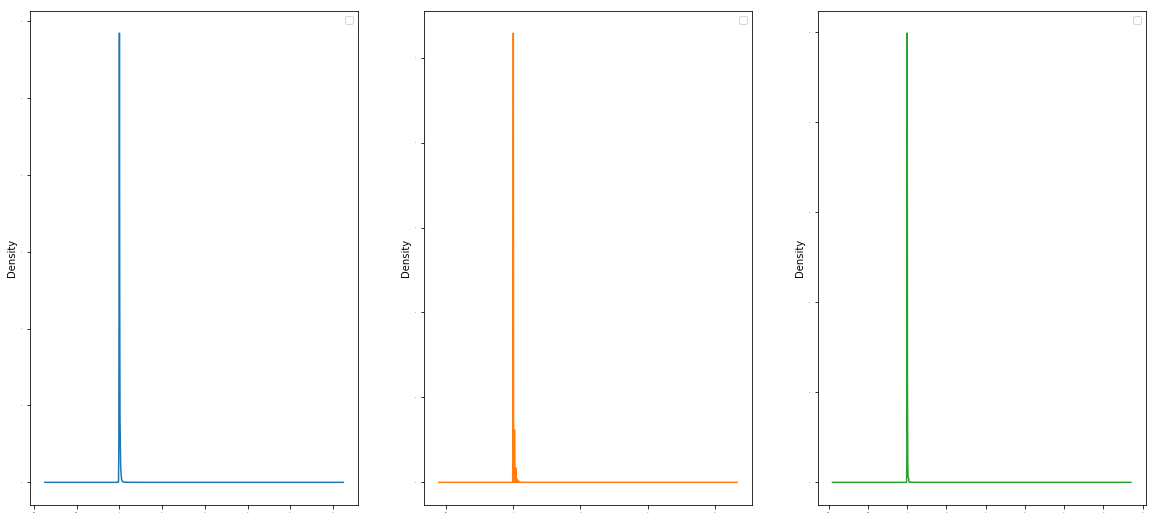

In [21]:
df2.plot(kind='density', subplots=True, layout=(2,3), sharex=False, legend=True, fontsize=1, figsize=(20,20))
pyplot.show()